In [140]:
import re 
import pandas as pd

In [141]:
f = open("WhatsApp Chat with HITK Official 27'.txt","r",encoding='utf-8')

In [142]:
data = f.read() # read in string format

In [143]:
# print(data)

In [144]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'


In [145]:
# data[1:]

In [146]:
messages = re.split(pattern,data[1:])

In [147]:
len(messages)

1

In [148]:
# messages



In [149]:
# Extract dates using regex
dates_pattern = r'\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2} [APM]{2}'
dates = re.findall(dates_pattern, data)


In [150]:
# dates

In [151]:
len(dates)
# len(messages)

4339

In [152]:
# Extract messages using regex
messages_pattern = r'(?<= - ).*'
messages = re.findall(messages_pattern, data)

# Remove dates from messages
messages = [re.sub(dates_pattern, '', msg).strip() for msg in messages]
# Remove system messages (like "created group" or "You were added") that might be causing the discrepancy
messages = [msg for msg in messages if not re.match(r'\+\d{2} \d{10}', msg.split(':')[0])]

len(messages)

4425

In [153]:
# messages

In [154]:
# Handling mismatch in lengths
if len(dates) > len(messages):
    dates = dates[:len(messages)]
elif len(messages) > len(dates):
    messages = messages[:len(dates)]

In [155]:
df = pd.DataFrame({'user_message':messages,'message_Date':dates})
#converting message_date time 
df['message_Date'] = pd.to_datetime(df['message_Date'],format = "%m/%d/%y, %I:%M %p")
df.rename(columns={"message_Date":"date"},inplace=True)
df.head()

,user_message,date
0,"+91 95316 14708 created group ""HITK Official 27'""",2023-08-25 09:03:00
1,You were added,2023-08-25 09:03:00
2,+91 80018 45577: Ye Pic to mai click kiya tha 🤌🏻🤣,2024-01-28 15:43:00
3,+91 80018 45577: Kaha se forward hua ye !!!😳,2024-01-28 15:44:00
4,+91 94508 79345: Bahut log ke pass hai,2024-01-28 16:39:00


In [156]:
df.shape

(4339, 2)

In [157]:
len(dates)

4339

In [158]:
len(messages)

4339

In [159]:
# Function to split user and message
def split_user_message(row):
    if ':' in row:
        user, message = row.split(':', 1)
        return pd.Series([user.strip(), message.strip()])
    else:
        return pd.Series([None, row.strip()])

# Apply function to DataFrame
df[['user', 'message']] = df['user_message'].apply(split_user_message)

# Drop the original user_message column
df.drop(columns=['user_message'], inplace=True)

# Extract user and message lists
user_list = df['user'].tolist()
message_list = df['message'].tolist()

In [160]:
df.head()

,date,user,message
0,2023-08-25 09:03:00,None,"+91 95316 14708 created group ""HITK Official 27'"""
1,2023-08-25 09:03:00,None,You were added
2,2024-01-28 15:43:00,+91 80018 45577,Ye Pic to mai click kiya tha 🤌🏻🤣
3,2024-01-28 15:44:00,+91 80018 45577,Kaha se forward hua ye !!!😳
4,2024-01-28 16:39:00,+91 94508 79345,Bahut log ke pass hai


In [161]:
df['Year']=df['date'].dt.year

In [162]:
df['Month']=df['date'].dt.month_name()

In [163]:
df['Day']=df['date'].dt.date

In [164]:
df.head()

,date,user,message,Year,Month,Day
0,2023-08-25 09:03:00,None,"+91 95316 14708 created group ""HITK Official 27'""",2023,August,2023-08-25
1,2023-08-25 09:03:00,None,You were added,2023,August,2023-08-25
2,2024-01-28 15:43:00,+91 80018 45577,Ye Pic to mai click kiya tha 🤌🏻🤣,2024,January,2024-01-28
3,2024-01-28 15:44:00,+91 80018 45577,Kaha se forward hua ye !!!😳,2024,January,2024-01-28
4,2024-01-28 16:39:00,+91 94508 79345,Bahut log ke pass hai,2024,January,2024-01-28


In [165]:
df['hour']=df['date'].dt.hour

In [166]:
df['minutes']=df['date'].dt.minute

In [167]:
df.head()

,date,user,message,Year,Month,Day,hour,minutes
0,2023-08-25 09:03:00,None,"+91 95316 14708 created group ""HITK Official 27'""",2023,August,2023-08-25,9,3
1,2023-08-25 09:03:00,None,You were added,2023,August,2023-08-25,9,3
2,2024-01-28 15:43:00,+91 80018 45577,Ye Pic to mai click kiya tha 🤌🏻🤣,2024,January,2024-01-28,15,43
3,2024-01-28 15:44:00,+91 80018 45577,Kaha se forward hua ye !!!😳,2024,January,2024-01-28,15,44
4,2024-01-28 16:39:00,+91 94508 79345,Bahut log ke pass hai,2024,January,2024-01-28,16,39


In [168]:
words=[]
for m in df['message']:
    words.extend(m.split())

In [169]:
len(words)

25203

In [170]:
total_media_shared = df[df['message'] == '<Media omitted>\n'].shape[0]


In [171]:
total_media_shared


0

In [172]:
# Check if any message contains "Media omitted"
contains_media_omitted = df['message'].str.contains('Media omitted', case=False, na=False).any()

if contains_media_omitted:
    print("At least one message contains 'Media omitted'")
else:
    print("No message contains 'Media omitted'")

At least one message contains 'Media omitted'


In [173]:
media_omitted_count = df['message'].str.count('Media omitted').sum()


In [174]:
media_omitted_count


560

In [175]:
# Filter the DataFrame for messages containing "Media omitted"
media_omitted_messages = df[df['message'].str.contains('Media omitted')]

# Print any one message containing "Media omitted"
if not media_omitted_messages.empty:
    print("One message containing 'Media omitted':")
    print(media_omitted_messages.iloc[0]['message'])
else:
    print("No message containing 'Media omitted' found.")

One message containing 'Media omitted':
<Media omitted>


In [176]:
from urlextract import URLExtract
extractor=URLExtract()
urls=extractor.find_urls("www.gmail.com")

In [177]:
urls

['www.gmail.com']

In [178]:
links=[]
for messages in df['message']:
    links.extend(extractor.find_urls(messages))

In [179]:
len(links)

48

In [180]:
df['user'].value_counts()

user
+91 90511 97772    566
+91 79803 84252    497
+91 70014 65132    282
+91 87773 27876    186
+91 62895 55055    174
                  ... 
+91 62018 27886      1
+91 86972 45778      1
+91 90605 97801      1
+91 81709 72994      1
+91 97989 41709      1
Name: count, Length: 265, dtype: int64

In [181]:
df['percentage_of_messages']=(df['user'].value_counts()/df.shape[0])*100

In [182]:
df.head()

,date,user,message,Year,Month,Day,hour,minutes,percentage_of_messages
0,2023-08-25 09:03:00,None,"+91 95316 14708 created group ""HITK Official 27'""",2023,August,2023-08-25,9,3,NaN
1,2023-08-25 09:03:00,None,You were added,2023,August,2023-08-25,9,3,NaN
2,2024-01-28 15:43:00,+91 80018 45577,Ye Pic to mai click kiya tha 🤌🏻🤣,2024,January,2024-01-28,15,43,NaN
3,2024-01-28 15:44:00,+91 80018 45577,Kaha se forward hua ye !!!😳,2024,January,2024-01-28,15,44,NaN
4,2024-01-28 16:39:00,+91 94508 79345,Bahut log ke pass hai,2024,January,2024-01-28,16,39,NaN


In [183]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={"count":"Percent","user":"Phone_number"})

,Phone_number,Percent
0,+91 90511 97772,13.04
1,+91 79803 84252,11.45
2,+91 70014 65132,6.50
3,+91 87773 27876,4.29
4,+91 62895 55055,4.01
...,...,...
260,+91 62018 27886,0.02
261,+91 86972 45778,0.02
262,+91 90605 97801,0.02
263,+91 81709 72994,0.02


In [184]:
words=[]
for messages in df['message']:
    words.extend(messages.split())

In [185]:
from collections import  Counter

In [186]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,<Media,560
1,omitted>,560
2,to,384
3,the,354
4,was,257
5,a,249
6,of,240
7,message,237
8,is,216
9,and,199


In [187]:
temp= df[df['user']!='group_notiication']

In [188]:
temp.shape

(4339, 9)

In [189]:
temp=temp[temp['message']!='<Media omitted>']

In [190]:
temp.head()

,date,user,message,Year,Month,Day,hour,minutes,percentage_of_messages
0,2023-08-25 09:03:00,None,"+91 95316 14708 created group ""HITK Official 27'""",2023,August,2023-08-25,9,3,NaN
1,2023-08-25 09:03:00,None,You were added,2023,August,2023-08-25,9,3,NaN
2,2024-01-28 15:43:00,+91 80018 45577,Ye Pic to mai click kiya tha 🤌🏻🤣,2024,January,2024-01-28,15,43,NaN
3,2024-01-28 15:44:00,+91 80018 45577,Kaha se forward hua ye !!!😳,2024,January,2024-01-28,15,44,NaN
4,2024-01-28 16:39:00,+91 94508 79345,Bahut log ke pass hai,2024,January,2024-01-28,16,39,NaN


In [191]:
# Open the file and read its contents into a list
with open("stop_hinglish.txt", "r") as f:
    stop_hinglish_list = f.readlines()

# Strip any newline characters from each line
stop_hinglish_list = [line.strip() for line in stop_hinglish_list]

# Print the list to verify its contents
print(stop_hinglish_list[:5])


['.', '..', '...', '?', '-']


In [192]:
len(stop_hinglish_list)

1055

In [193]:
stop_words=f1.read()

In [194]:
stop_words

''

In [195]:
words=[]
for messages in temp['message']:
    for word in messages.lower().split():
        if word not in stop_hinglish_list:
            words.extend(word.split())
#         words.extend(messages.split())

In [196]:
len(words)

13218

In [197]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,237
1,deleted,179
2,ai,71
3,e,55
4,<this,52
5,edited>,52
6,er,50
7,college,48
8,fees,45
9,💀,43


In [198]:
import emoji

In [199]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])



In [200]:
emojis[3]

'😳'

In [201]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🤣,272
1,😂,146
2,💀,101
3,❤,58
4,💚,53
...,...,...
138,😱,1
139,🤨,1
140,🦜,1
141,🛐,1


In [202]:
e_df=pd.DataFrame(emojis)

In [203]:
e_df.head()

,0
0,🤌
1,🏻
2,🤣
3,😳
4,🌚


In [204]:
# Create a DataFrame with the emoji column
e_df = pd.DataFrame(emojis, columns=['emoji'])

# Calculate the counts of each emoji
emoji_counts = e_df['emoji'].value_counts().reset_index()
emoji_counts.columns = ['emoji', 'count']

# Sort the DataFrame by the number of occurrences in descending order
e_df_sorted = emoji_counts.sort_values(by='count', ascending=False)


In [205]:
e_df_sorted.head()

,emoji,count
0,🤣,272
1,😂,146
2,💀,101
3,❤,58
4,💚,53


In [206]:
df['month_number'] = df['date'].dt.month

In [207]:
timeline=df.groupby(['Year','month_number','Month']).count()['message'].reset_index()

In [208]:
timeline.shape

(7, 4)

In [209]:
timeline.head()

,Year,month_number,Month,message
0,2023,8,August,2
1,2024,1,January,21
2,2024,2,February,1589
3,2024,3,March,686
4,2024,4,April,656


In [210]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['Month'][i] + "-" + str(timeline['Year'][i]))


In [211]:
timeline['time']=time
timeline

,Year,month_number,Month,message,time
0,2023,8,August,2,August-2023
1,2024,1,January,21,January-2024
2,2024,2,February,1589,February-2024
3,2024,3,March,686,March-2024
4,2024,4,April,656,April-2024
5,2024,5,May,1198,May-2024
6,2024,6,June,187,June-2024


In [212]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'August-2023'),
  Text(1, 0, 'January-2024'),
  Text(2, 0, 'February-2024'),
  Text(3, 0, 'March-2024'),
  Text(4, 0, 'April-2024'),
  Text(5, 0, 'May-2024'),
  Text(6, 0, 'June-2024')])

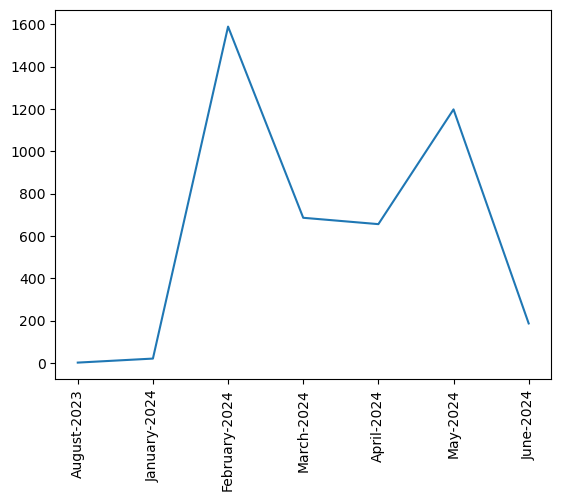

In [213]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')

In [214]:
df['only_date']=df['date'].dt.date

In [215]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

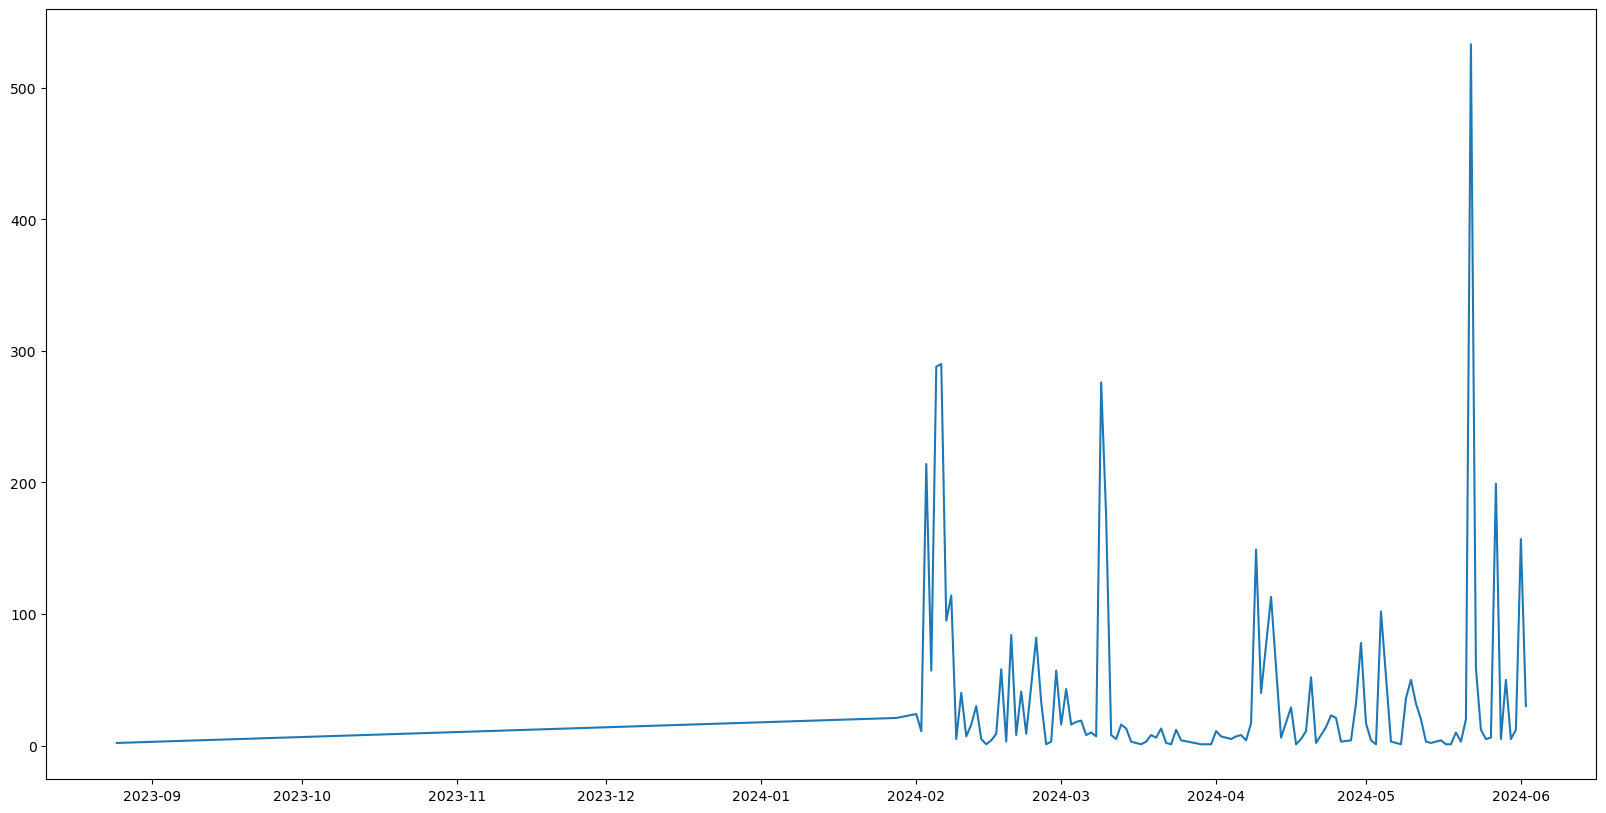

In [216]:
plt.figure(figsize=(20,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [217]:
df.head(1)

,date,user,message,Year,Month,Day,hour,minutes,percentage_of_messages,month_number,only_date
0,2023-08-25 09:03:00,None,"+91 95316 14708 created group ""HITK Official 27'""",2023,August,2023-08-25,9,3,NaN,8,2023-08-25


In [218]:
df['date']

0      2023-08-25 09:03:00
1      2023-08-25 09:03:00
2      2024-01-28 15:43:00
3      2024-01-28 15:44:00
4      2024-01-28 16:39:00
               ...        
4334   2024-06-02 00:54:00
4335   2024-06-02 00:54:00
4336   2024-06-02 01:01:00
4337   2024-06-02 01:06:00
4338   2024-06-02 01:28:00
Name: date, Length: 4339, dtype: datetime64[ns]

In [219]:
df['day_name']=df['date'].dt.day_name()

In [220]:
# Assuming 'date' column is in string format
df['date'] = pd.to_datetime(df['date'])

# Now you can use the .dt accessor
df['day_name'] = df['date'].dt.day_name()

In [223]:
df['day_name'].value_counts()

day_name
Saturday     942
Wednesday    812
Tuesday      743
Monday       649
Sunday       511
Thursday     412
Friday       270
Name: count, dtype: int64

In [229]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour==0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))
        
df['period']=period

In [230]:
df.head()

,date,user,message,Year,Month,Day,hour,minutes,percentage_of_messages,month_number,only_date,day_name,period
0,2023-08-25 09:03:00,None,"+91 95316 14708 created group ""HITK Official 27'""",2023,August,2023-08-25,9,3,NaN,8,2023-08-25,Friday,9-10
1,2023-08-25 09:03:00,None,You were added,2023,August,2023-08-25,9,3,NaN,8,2023-08-25,Friday,9-10
2,2024-01-28 15:43:00,+91 80018 45577,Ye Pic to mai click kiya tha 🤌🏻🤣,2024,January,2024-01-28,15,43,NaN,1,2024-01-28,Sunday,15-16
3,2024-01-28 15:44:00,+91 80018 45577,Kaha se forward hua ye !!!😳,2024,January,2024-01-28,15,44,NaN,1,2024-01-28,Sunday,15-16
4,2024-01-28 16:39:00,+91 94508 79345,Bahut log ke pass hai,2024,January,2024-01-28,16,39,NaN,1,2024-01-28,Sunday,16-17


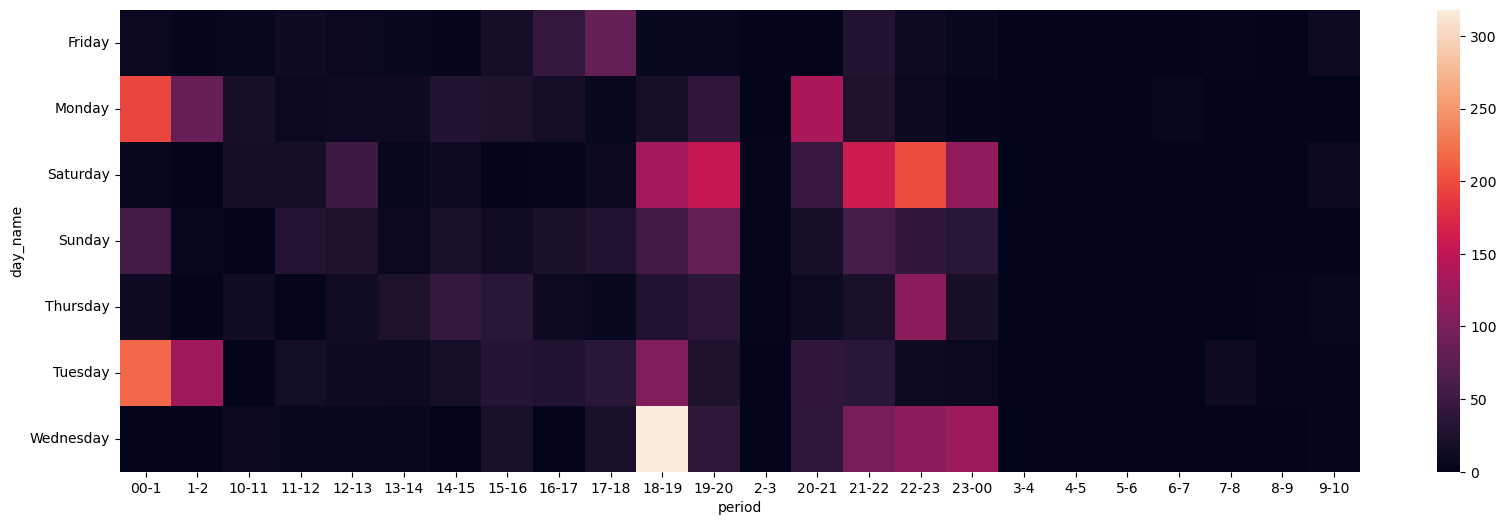

In [232]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index="day_name",columns="period",values="message",aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()